In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import pickle
from sklearn import metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
import xgboost 
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import VarianceThreshold

sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [174]:
df = pd.read_csv('Train.csv')
df.sample(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
122,FDB14,20.25,Regular,0.171939,Canned,92.5120,OUT010,1998,NaN,Tier 3,Grocery Store,186.4240
378,FDV02,16.75,Low Fat,0.060495,Dairy,169.8106,OUT013,1987,High,Tier 3,Supermarket Type1,3251.1014
4843,NCF18,18.35,Low Fat,0.088909,Household,192.8504,OUT013,1987,High,Tier 3,Supermarket Type1,2876.2560
5385,FDT15,12.15,Regular,0.042855,Meat,181.6950,OUT018,2009,Medium,Tier 3,Supermarket Type2,2929.5200


### 1. primary processing of Dataset

In [175]:
print('Columns Names:\n\n',list(df.columns))

Columns Names:

 ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales']


In [176]:
df.shape

(8523, 12)

In [177]:
for col in list(df.columns):
    if type(df[col][0])==str:
        print(f'\nUNIQUE VALUES FOR |{col}|:', df[col].unique())
    else: pass


UNIQUE VALUES FOR |Item_Identifier|: ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']

UNIQUE VALUES FOR |Item_Fat_Content|: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

UNIQUE VALUES FOR |Item_Type|: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

UNIQUE VALUES FOR |Outlet_Identifier|: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

UNIQUE VALUES FOR |Outlet_Size|: ['Medium' nan 'High' 'Small']

UNIQUE VALUES FOR |Outlet_Location_Type|: ['Tier 1' 'Tier 3' 'Tier 2']

UNIQUE VALUES FOR |Outlet_Type|: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


**so, at first I will remove three columns say 'Item_Identifier', 'Item_Weight' & 'Outlet_Identifier'**
**and also replace proper unique name for 'Item_Fat_Content'**

In [178]:
df.drop(['Item_Identifier', 'Outlet_Identifier', 'Item_Weight'], axis=1, inplace=True)

In [179]:
df.shape

(8523, 9)

In [180]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].map({'Low Fat':'low_fat','low fat':'low_fat','LF':'low_fat','reg':'regular','Regular':'regular'})

In [181]:
df['Item_Fat_Content'].unique()

array(['low_fat', 'regular'], dtype=object)

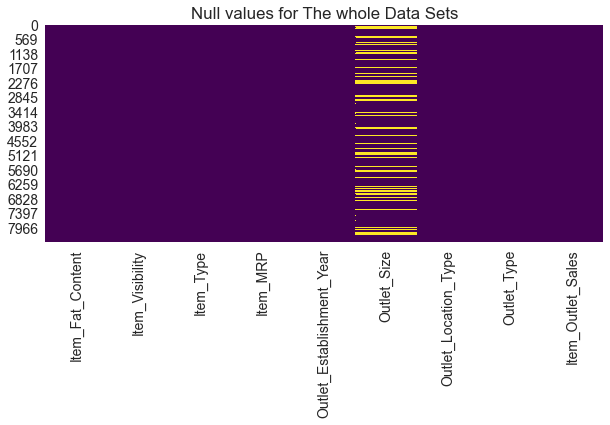

In [182]:
plt.rcParams['font.size'] = 14
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(),cmap='viridis',cbar=False)
plt.title('Null values for The whole Data Sets')
plt.show()

In [183]:
market1 = df[df['Outlet_Type'] =='Supermarket Type1']
market2 = df[df['Outlet_Type'] =='Supermarket Type2']
market3 = df[df['Outlet_Type'] =='Supermarket Type3']
grocery = df[df['Outlet_Type'] =='Grocery Store']

In [184]:
print('Type of Outlet Size:',df.Outlet_Size.unique())

Type of Outlet Size: ['Medium' nan 'High' 'Small']


In [185]:
print('Outlet Locations:',df.Outlet_Location_Type.unique())

Outlet Locations: ['Tier 1' 'Tier 3' 'Tier 2']


In [186]:
market1.isnull().sum()

Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1855
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [187]:
market1[market1['Outlet_Location_Type'] == 'Tier 2'].isnull().sum()

Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1855
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [188]:
market1[market1['Outlet_Location_Type'] == 'Tier 2'].Outlet_Size.unique()

array([nan, 'Small'], dtype=object)

In [189]:
market2.isnull().sum()

Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [190]:
market3.isnull().sum()

Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [191]:
grocery.isnull().sum()

Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Establishment_Year      0
Outlet_Size                  555
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

In [192]:
grocery[grocery['Outlet_Location_Type'] == 'Tier 1'].Outlet_Size.unique()

array(['Small'], dtype=object)

In [193]:
grocery[grocery['Outlet_Location_Type'] == 'Tier 2'].Outlet_Size.unique()

array([], dtype=object)

In [194]:
grocery[grocery['Outlet_Location_Type'] == 'Tier 3'].Outlet_Size.unique()

array([nan], dtype=object)

**Here we can see that all the outlet sizes are 'Small' & 'nan' in supermarket type-1 of Tier-2 & Grocery of Tier-3 city, so we can replace 'nan' values to 'small'...**

In [195]:
df.Outlet_Size.fillna("Small",inplace= True)

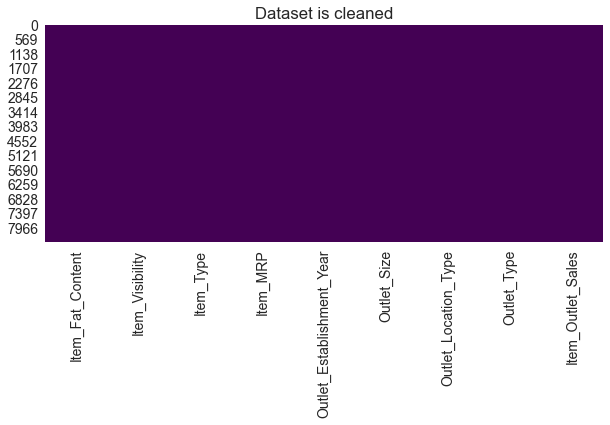

In [196]:
plt.rcParams['font.size'] =14
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(),cmap='viridis',cbar=False)
plt.title('Dataset is cleaned')
plt.show()

**So, all null values replaced**

# EDA

In [197]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Fat_Content           8523 non-null   object 
 1   Item_Visibility            8523 non-null   float64
 2   Item_Type                  8523 non-null   object 
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Establishment_Year  8523 non-null   int64  
 5   Outlet_Size                8523 non-null   object 
 6   Outlet_Location_Type       8523 non-null   object 
 7   Outlet_Type                8523 non-null   object 
 8   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 599.4+ KB
None


In [198]:
df.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


In [199]:
print('Number of items per Item types:-\n')
print(df['Item_Type'].value_counts())

Number of items per Item types:-

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


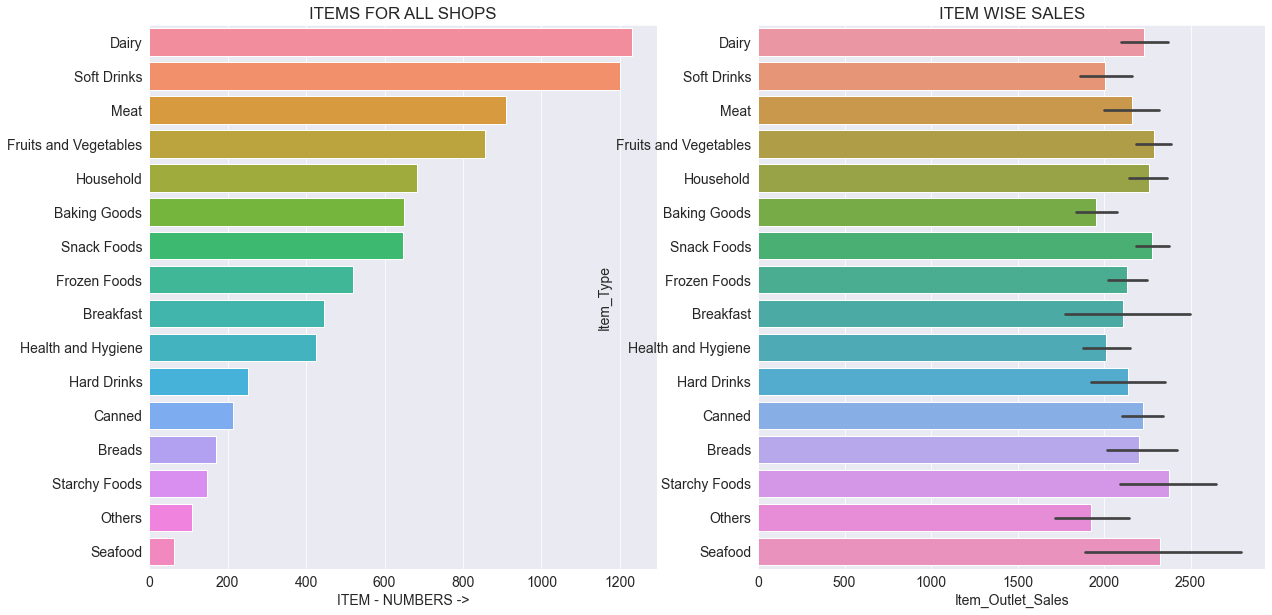

In [200]:
plt.rcParams['font.size'] =14
f,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
sns.barplot(y=df['Item_Type'].unique(),x=df['Item_Type'].value_counts(),saturation=0.9, ax=ax1)
ax1.set_title('ITEMS FOR ALL SHOPS')
ax1.set_xlabel('ITEM - NUMBERS ->')
sns.barplot(y=df['Item_Type'],x=df['Item_Outlet_Sales'], ax= ax2)
ax2.set_title('ITEM WISE SALES')
plt.show()

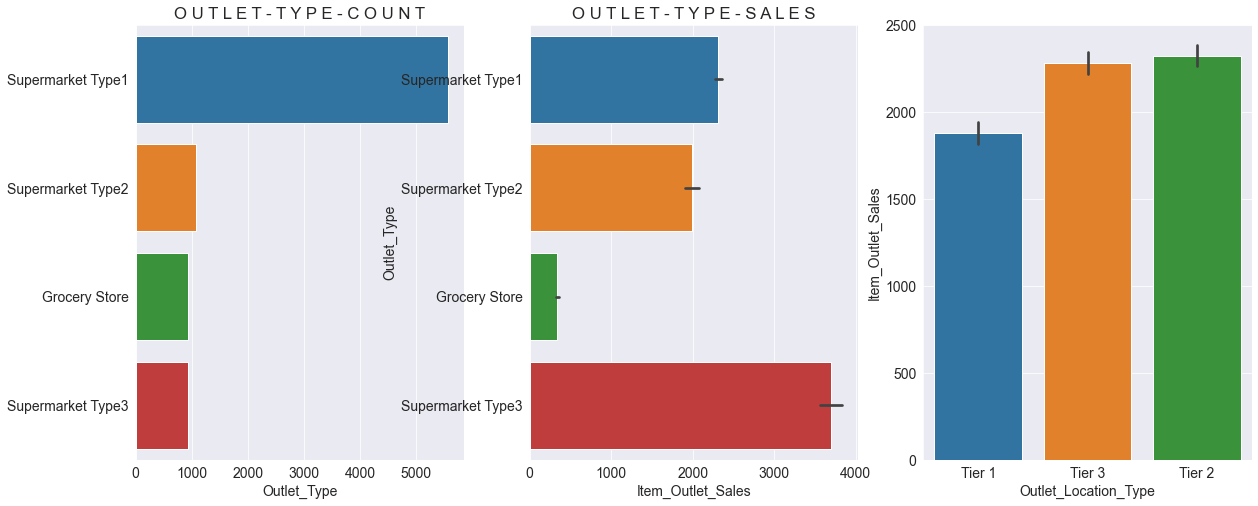

In [201]:
plt.rcParams['font.size'] =14
f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,8))
sns.barplot(y=df['Outlet_Type'].unique(),x=df['Outlet_Type'].value_counts(), ax=ax1)
sns.barplot(y=df['Outlet_Type'],x=df['Item_Outlet_Sales'], ax=ax2)
sns.barplot(x=df['Outlet_Location_Type'],y=df['Item_Outlet_Sales'], ax=ax3)
ax1.set_title('O U T L E T - T Y P E - C O U N T')
ax2.set_title('O U T L E T - L O C A T I O N - S A L E S')
ax2.set_title('O U T L E T - T Y P E - S A L E S')
plt.show()

Total Number of Super Market-1:  5577


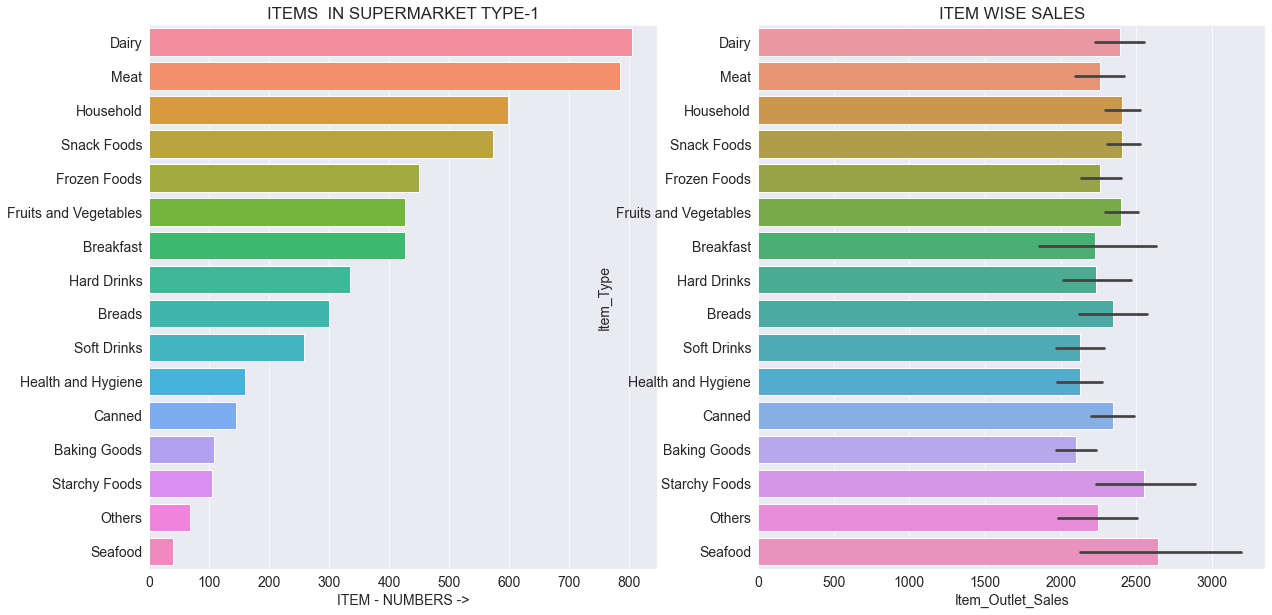

In [202]:
print('Total Number of Super Market-1: ',len(market1))
plt.rcParams['font.size'] =14
f,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
sns.barplot(y=market1['Item_Type'].unique(),x=market1['Item_Type'].value_counts(),saturation=0.9, ax=ax1)
ax1.set_title('ITEMS  IN SUPERMARKET TYPE-1')
ax1.set_xlabel('ITEM - NUMBERS ->')
sns.barplot(y=market1['Item_Type'],x=market1['Item_Outlet_Sales'], ax= ax2)
ax2.set_title('ITEM WISE SALES')
plt.show()

Total Number of Super Market Type-2:  928


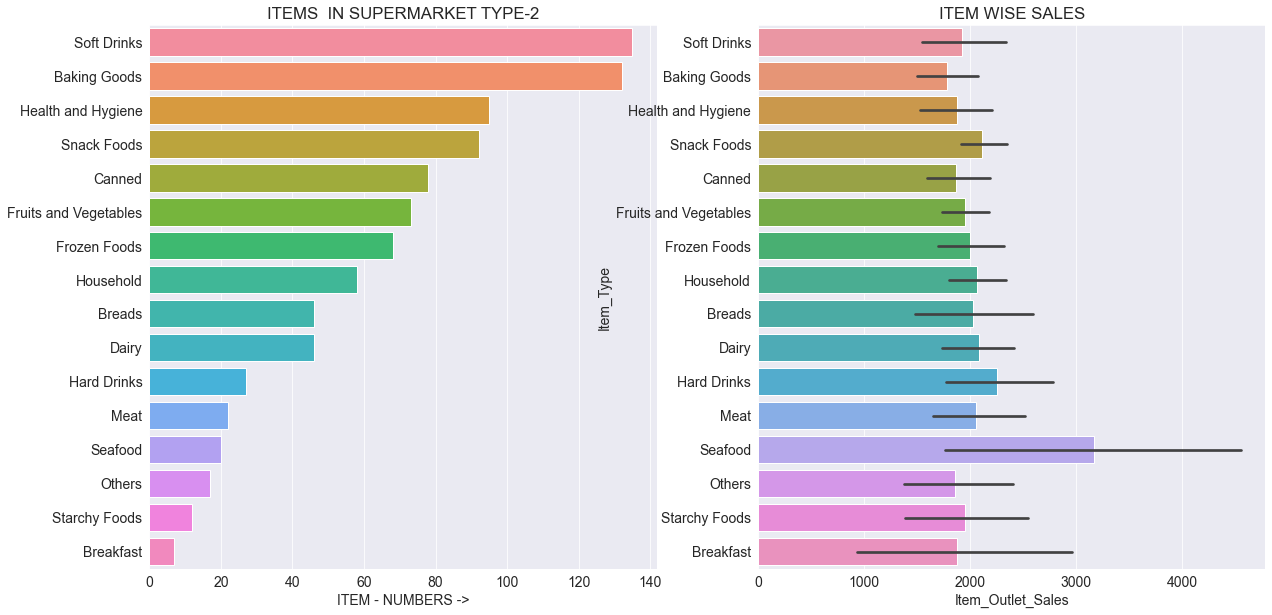

In [203]:
print('Total Number of Super Market Type-2: ',len(market2))
plt.rcParams['font.size'] =14
f,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
sns.barplot(y=market2['Item_Type'].unique(),x=market2['Item_Type'].value_counts(),saturation=0.9, ax=ax1)
ax1.set_title('ITEMS  IN SUPERMARKET TYPE-2')
ax1.set_xlabel('ITEM - NUMBERS ->')
sns.barplot(y=market2['Item_Type'],x=market2['Item_Outlet_Sales'], ax= ax2)
ax2.set_title('ITEM WISE SALES')
plt.show()

Total Number of Super Market-3:  935


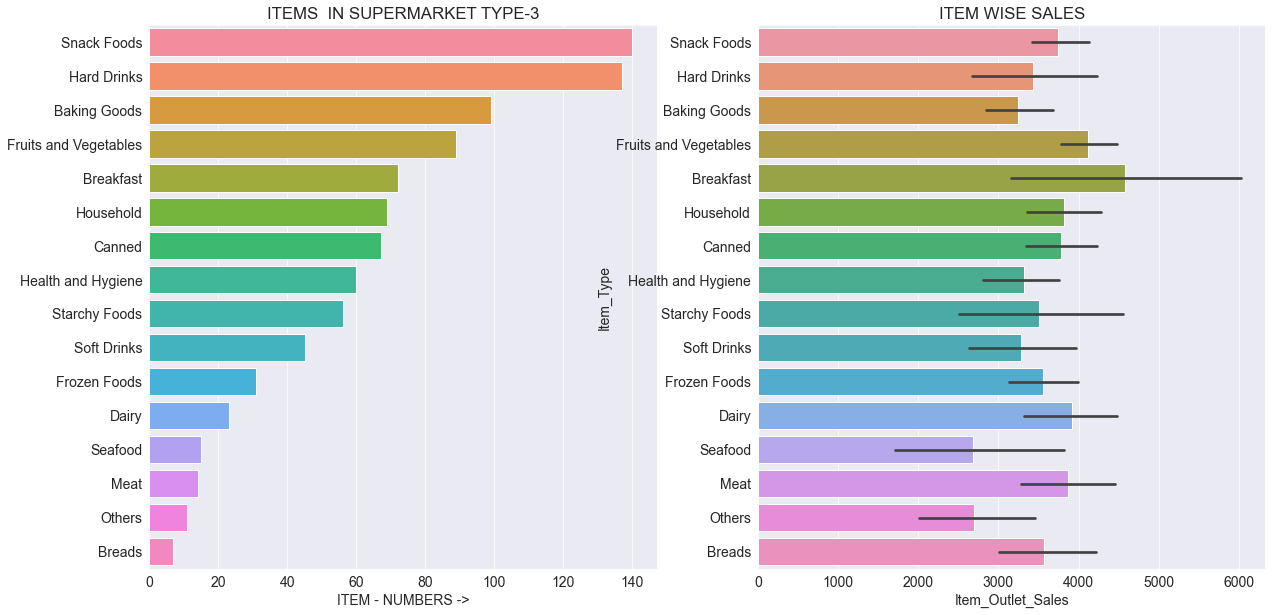

In [204]:
print('Total Number of Super Market-3: ',len(market3))
plt.rcParams['font.size'] =14
f,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
sns.barplot(y=market3['Item_Type'].unique(),x=market3['Item_Type'].value_counts(),saturation=0.9, ax=ax1)
ax1.set_title('ITEMS  IN SUPERMARKET TYPE-3')
ax1.set_xlabel('ITEM - NUMBERS ->')
sns.barplot(y=market3['Item_Type'],x=market3['Item_Outlet_Sales'], ax= ax2)
ax2.set_title('ITEM WISE SALES')
plt.show()

Total Number of Grocery Shop:  1083


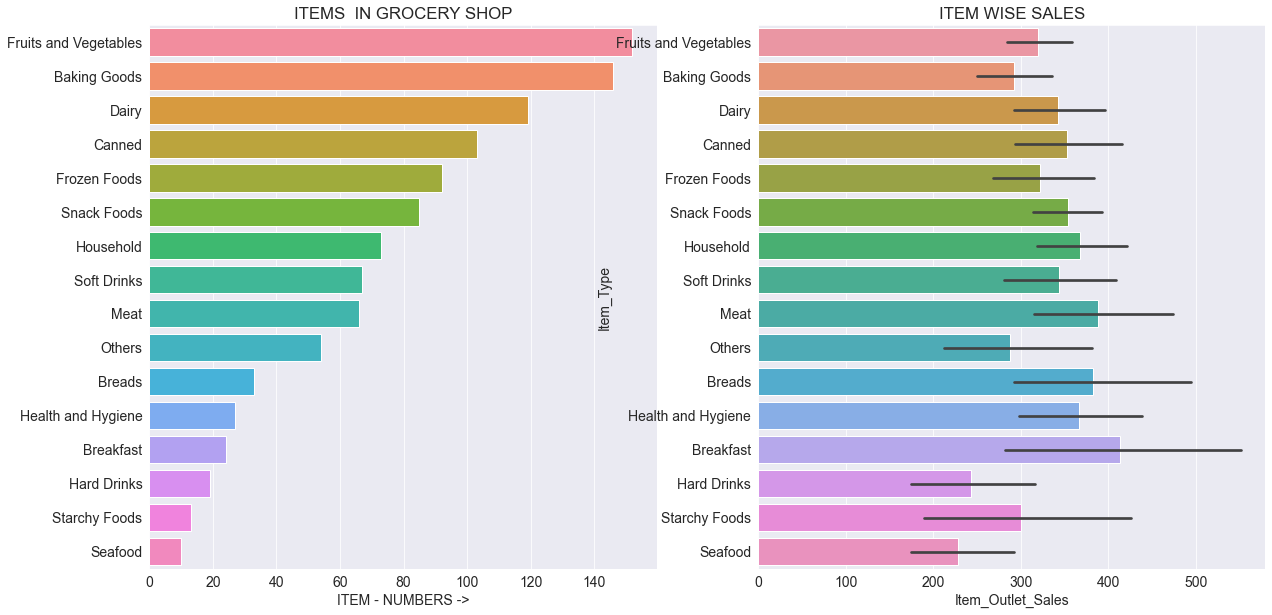

In [205]:
print('Total Number of Grocery Shop: ',len(grocery))
plt.rcParams['font.size'] =14
f,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
sns.barplot(y=grocery['Item_Type'].unique(),x=grocery['Item_Type'].value_counts(),saturation=0.9, ax=ax1)
ax1.set_title('ITEMS  IN GROCERY SHOP')
ax1.set_xlabel('ITEM - NUMBERS ->')
sns.barplot(y=grocery['Item_Type'],x=grocery['Item_Outlet_Sales'], ax= ax2)
ax2.set_title('ITEM WISE SALES')
plt.show()

Total Sales According to Different Outlet Size:---


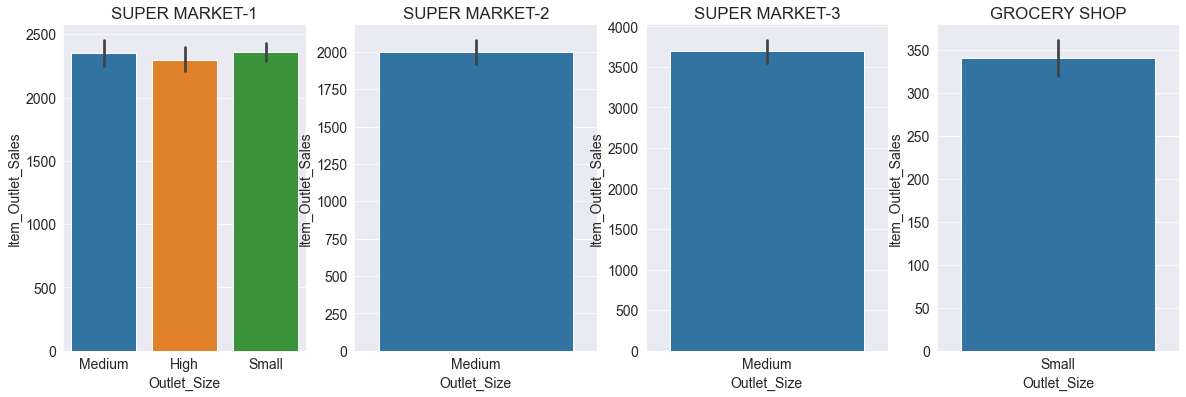

In [206]:
print('Total Sales According to Different Outlet Size:---')
plt.rcParams['font.size'] =14
f,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,6))
sns.barplot(x=market1['Outlet_Size'],y=market1['Item_Outlet_Sales'], ax= ax1)
sns.barplot(x=market2['Outlet_Size'],y=market2['Item_Outlet_Sales'], ax= ax2)
sns.barplot(x=market3['Outlet_Size'],y=market3['Item_Outlet_Sales'], ax= ax3)
sns.barplot(x=grocery['Outlet_Size'],y=grocery['Item_Outlet_Sales'], ax= ax4)

ax1.set_title('SUPER MARKET-1')
ax2.set_title('SUPER MARKET-2')
ax3.set_title('SUPER MARKET-3')
ax4.set_title('GROCERY SHOP')
plt.show()

Total Sales According to Different Location :---


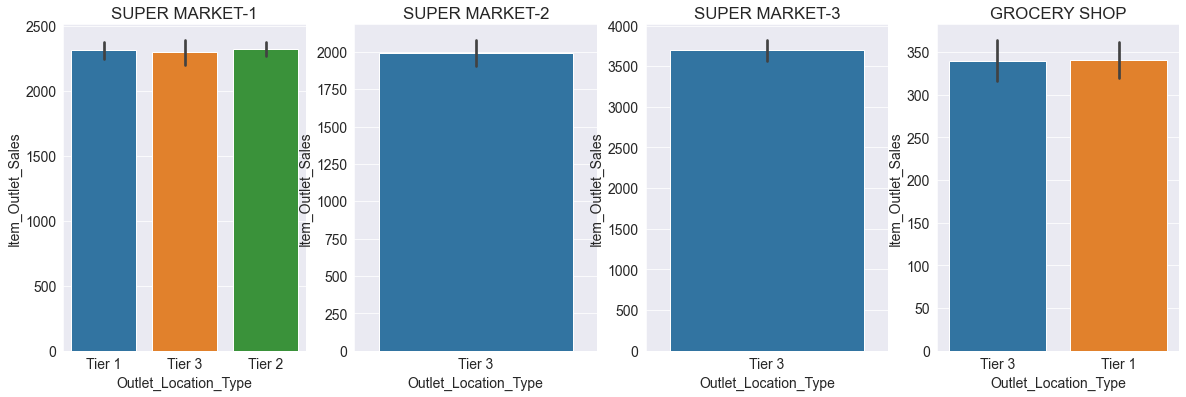

In [207]:
print('Total Sales According to Different Location :---')
plt.rcParams['font.size'] =14
f,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,6))
sns.barplot(x=market1['Outlet_Location_Type'],y=market1['Item_Outlet_Sales'], ax= ax1)
sns.barplot(x=market2['Outlet_Location_Type'],y=market2['Item_Outlet_Sales'], ax= ax2)
sns.barplot(x=market3['Outlet_Location_Type'],y=market3['Item_Outlet_Sales'], ax= ax3)
sns.barplot(x=grocery['Outlet_Location_Type'],y=grocery['Item_Outlet_Sales'], ax= ax4)

ax1.set_title('SUPER MARKET-1')
ax2.set_title('SUPER MARKET-2')
ax3.set_title('SUPER MARKET-3')
ax4.set_title('GROCERY SHOP')
plt.show()

TOTAL SALES ACCORDING TO FAT CONTENT IN DIFFERENT LOCATIONS: ---


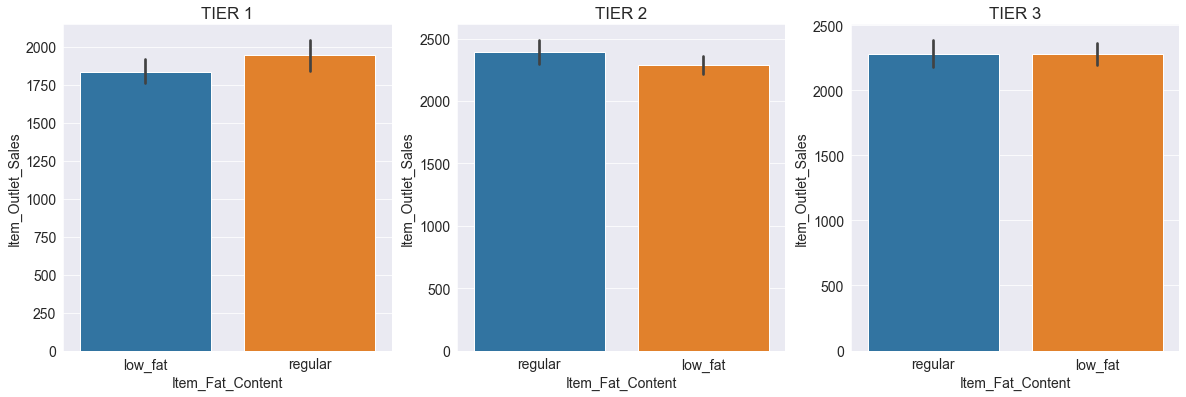

In [208]:
loc1 = df[df['Outlet_Location_Type']== 'Tier 1']
loc2 = df[df['Outlet_Location_Type']== 'Tier 2']
loc3 = df[df['Outlet_Location_Type']== 'Tier 3']

print('TOTAL SALES ACCORDING TO FAT CONTENT IN DIFFERENT LOCATIONS: ---')
plt.rcParams['font.size'] =14
f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,6))
sns.barplot(x=loc1['Item_Fat_Content'],y=loc1['Item_Outlet_Sales'], ax= ax1)
sns.barplot(x=loc2['Item_Fat_Content'],y=loc2['Item_Outlet_Sales'], ax= ax2)
sns.barplot(x=loc3['Item_Fat_Content'],y=loc3['Item_Outlet_Sales'], ax= ax3)


ax1.set_title('TIER 1')
ax2.set_title('TIER 2')
ax3.set_title('TIER 3')

plt.show()

In [209]:
super1 = df[df['Outlet_Type'] =='Supermarket Type1']
super1['Item_Fat_Content'].value_counts()

low_fat    3609
regular    1968
Name: Item_Fat_Content, dtype: int64

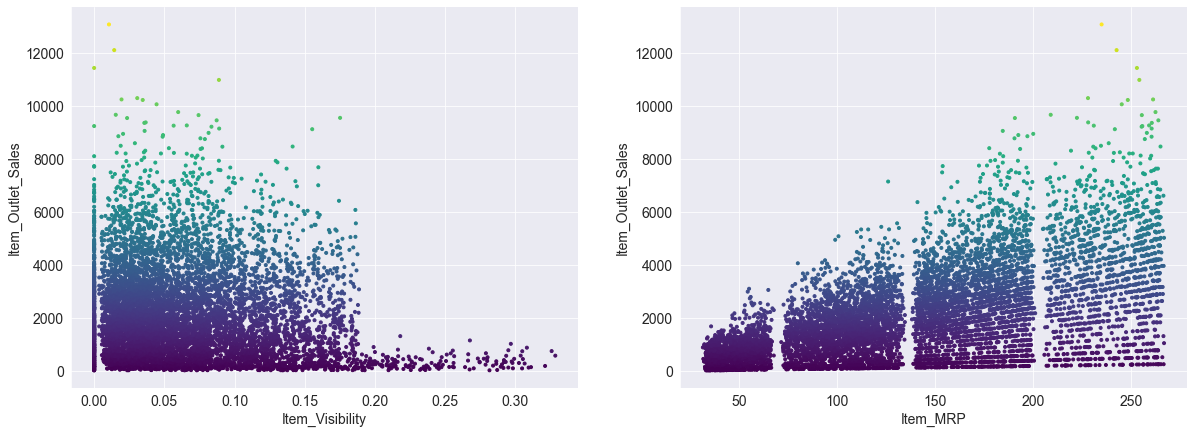

In [210]:
plt.rcParams['font.size'] =14
f,(ax1,ax2) = plt.subplots(1,2,figsize=(20,7))
ax1.scatter(df['Item_Visibility'],df['Item_Outlet_Sales'],c=df['Item_Outlet_Sales'],marker='.',cmap='viridis')
ax2.scatter(df['Item_MRP'],df['Item_Outlet_Sales'],c=df['Item_Outlet_Sales'],marker='.',cmap='viridis')

ax1.set_xlabel('Item_Visibility')
ax1.set_ylabel('Item_Outlet_Sales')
ax2.set_xlabel('Item_MRP')
ax2.set_ylabel('Item_Outlet_Sales')
sns.despine()
plt.show()

In [211]:
col = ['Item_Visibility','Item_MRP','Item_Outlet_Sales']
list(df.columns)

['Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

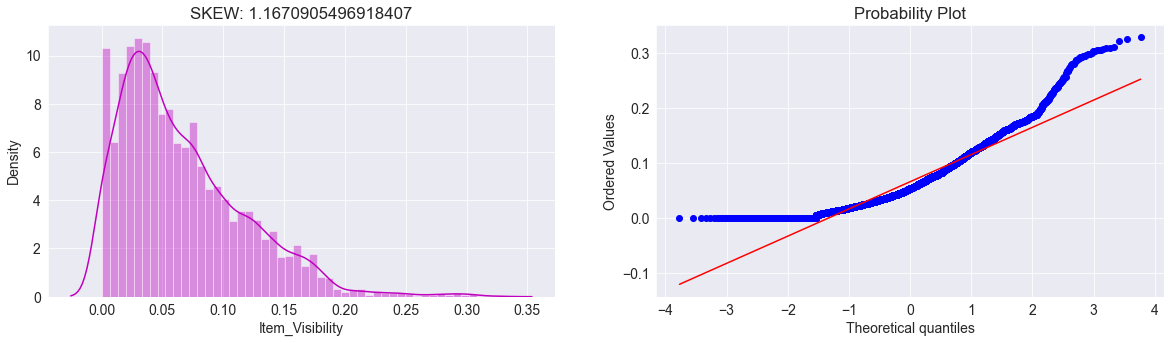

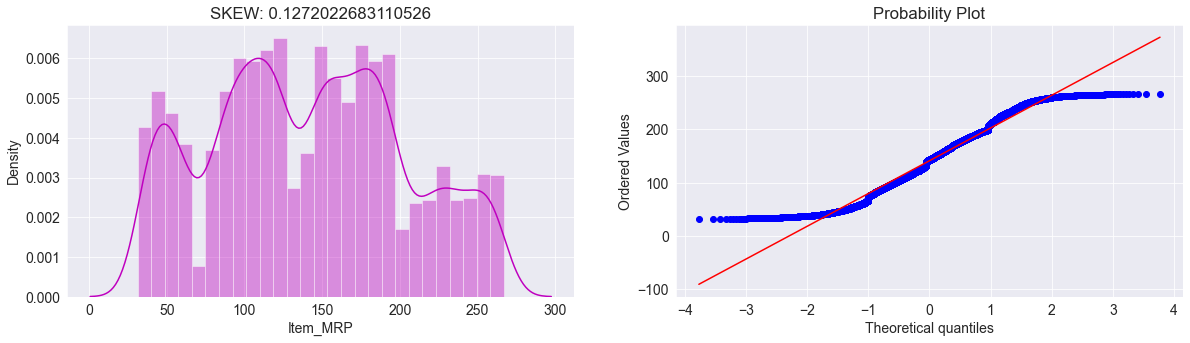

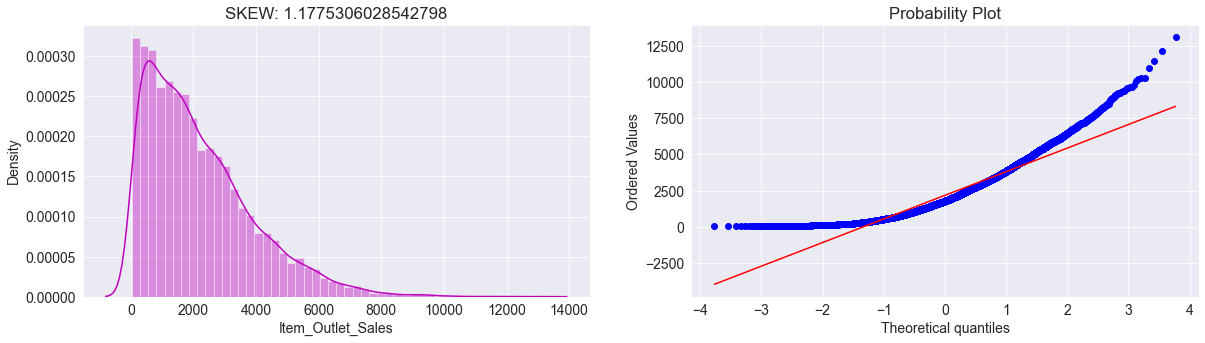

In [212]:
for cl in col:
    plt.rcParams['font.size'] =14
    f,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
    sns.distplot(df[cl],color='m', ax=ax1)
    ax1.set_title('SKEW: {}'.format(df[cl].skew()))
    stats.probplot(df[cl], dist="norm", plot=plt)
    plt.show()

**2.Modifying 'Outlet_Establishment_Year' length of year**

In [213]:
df.Outlet_Establishment_Year.min(), df.Outlet_Establishment_Year.max()

(1985, 2009)

In [214]:
df['Years'] = 2010 - df['Outlet_Establishment_Year']
del df['Outlet_Establishment_Year']

### 3. label encoding

In [215]:
df['Item_Fat_Content'].replace({'low_fat':1,'regular':2},inplace = True)
df['Outlet_Size'].replace({'Small':1,'Medium':2,'High':3},inplace = True)
df['Outlet_Location_Type'].replace({'Tier 1':3,'Tier 2':2,'Tier 3':1},inplace = True)
df['Outlet_Type'].replace({'Supermarket Type1':4,'Supermarket Type2':3,'Supermarket Type3':2,'Grocery Store':1},inplace = True)

In [216]:
len(df['Item_Type'].unique())

16

In [217]:
encoder = LabelEncoder()

In [218]:
df['Item_Type'] = encoder.fit_transform(df['Item_Type'])

In [219]:
df.sample(2)

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years
322,1,0.049357,14,62.6168,1,2,4,958.7520,3
2957,1,0.071136,8,42.7086,1,3,4,356.8688,13


### making square root to handle the skewness

In [220]:
df['Item_Visibility'] = df['Item_Visibility']**0.5
df['Item_Outlet_Sales'] = df['Item_Outlet_Sales']**0.5

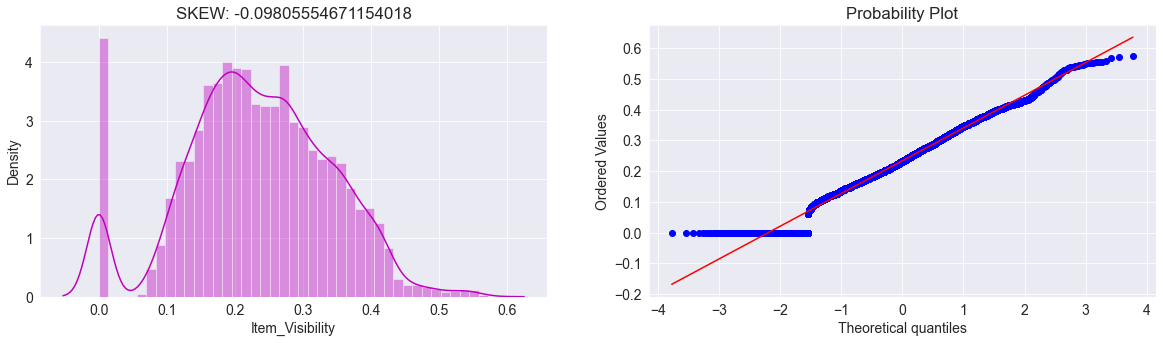

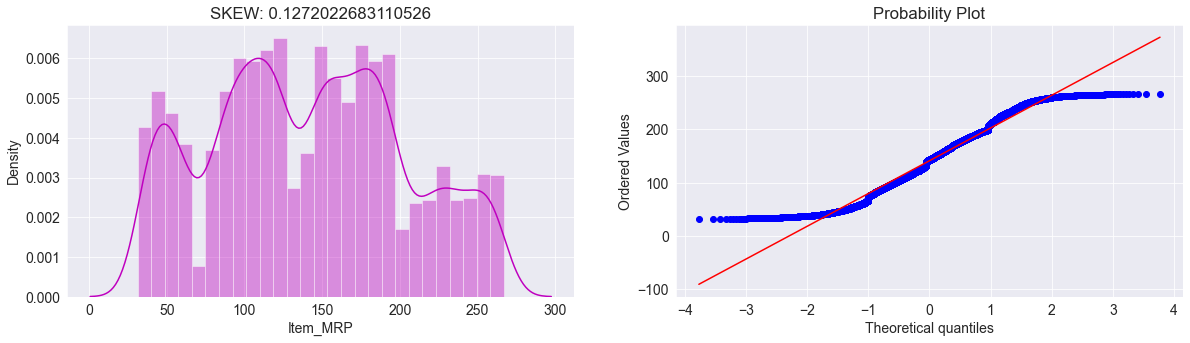

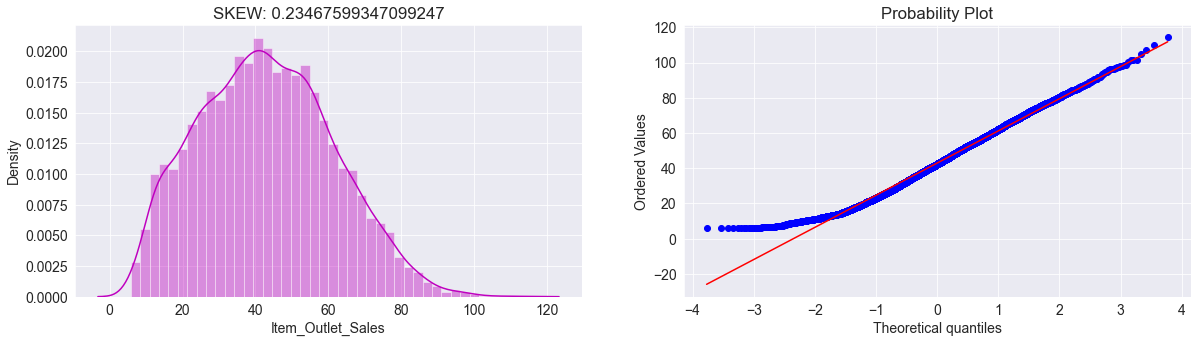

In [221]:
for cl in col:
    plt.rcParams['font.size'] =14
    f,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
    sns.distplot(df[cl],color='m', ax=ax1)
    ax1.set_title('SKEW: {}'.format(df[cl].skew()))
    stats.probplot(df[cl], dist="norm", plot=plt)
    plt.show()

# Feature Selections / Feature importance


In [222]:
corr = df.corr()
out = corr[['Item_Outlet_Sales']]
out = out.sort_values(by='Item_Outlet_Sales',ascending=False)
out

,Item_Outlet_Sales
Item_Outlet_Sales,1.000000
Item_MRP,0.563434
Outlet_Type,0.327995
Outlet_Size,0.189842
Item_Type,0.019436
Item_Fat_Content,0.017384
Years,-0.007511
Outlet_Location_Type,-0.077149
Item_Visibility,-0.127308



   Feature Importance:


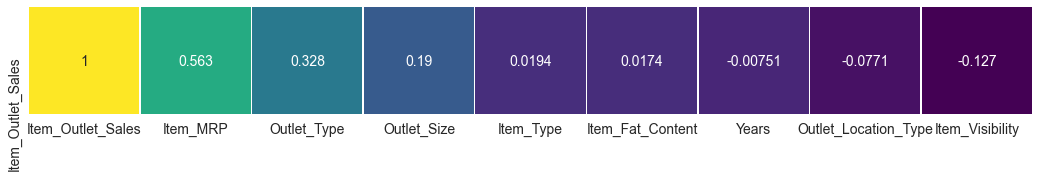

In [223]:
plt.rcParams['font.size'] =14
print("\n   Feature Importance:")
plt.figure(figsize=(18,2))
sns.heatmap(out.T,annot=True,fmt='.3g',linewidths=0.5,cbar=False,cmap='viridis')
plt.show()

here we can see that there are 3 columns 'Years','Item_Visibility','Outlet_Location_Type' are negatively related with the 'Item_Outlet_Sales'

Also, From the above heatmap I can say that 'Years' has very less corelation with Outlet Sales. So I can remove this feature.

In [224]:
df.drop(['Years'], axis=1, inplace=True)

In [225]:
df.to_csv('cleaned_train_data.csv', index=None)

In [226]:
list(df.columns)

['Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

**3. Removal of Constant and Quasi constant from 8 features if any**

In [227]:
y = df['Item_Outlet_Sales'].copy()
x = df.drop(['Item_Outlet_Sales'],axis=1).copy()

In [228]:
def Const_remove(x):
    const = VarianceThreshold(threshold=0.01)
    const.fit(x)
    c = const.get_support()
    feature_important = x.columns[c]
    print("Reduced :",(len(x.columns)-len(feature_important)), 'columns')
    return x[feature_important]

In [229]:
important_features = Const_remove(x)
print('Important Features:\n',important_features.columns)

Reduced : 0 columns
Important Features:
 Index(['Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


In [230]:
list(x.columns)

['Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [231]:
x_col = list(x.columns)

In [232]:
del x

In [233]:
del y

In [234]:
del df

**Importing cleaned data**

In [235]:
df = pd.read_csv('cleaned_train_data.csv')
df.sample(3)

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1529,2,0.377374,15,171.9448,1,3,4,61.235493
1333,1,0.181827,10,172.4738,3,1,4,43.720839
5907,1,0.417192,4,52.9298,1,3,4,25.439292


In [236]:
X = df[x_col].copy()

In [237]:
Y = df['Item_Outlet_Sales']

In [238]:
x_train, x_val, y_train, y_val = train_test_split(X,Y, test_size=0.1, random_state=42)

In [239]:
x_train.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
4608,2,0.274121,1,145.8444,2,1,2
4527,1,0.309348,0,159.7604,1,2,4
6426,1,0.271417,11,66.2142,2,1,3
2918,2,0.158274,6,97.1410,2,1,3
4920,2,0.225072,1,249.9092,1,1,1


**making pipeline**

In [240]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [241]:
trans1 = ColumnTransformer([('fat_content_and_item_type',
                             OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,2])
                           ],remainder='passthrough')

In [242]:
pipe = Pipeline([
    ('trans1',trans1)
])

In [243]:
x_train = pipe.fit_transform(x_train)
x_train.shape

(7670, 23)

In [244]:
x_val = pipe.transform(x_val)
x_val.shape

(853, 23)

In [245]:
len(x_train), len(y_val)

(7670, 853)

# Creating models

#### 1. Xgb-regressor

In [246]:
from xgboost import XGBRegressor
xg_model = XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror')

In [247]:
def evaluate(model):
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    train_rmse = mean_squared_error(y_train, train_pred, squared=False)
    val_pred = model.predict(x_val)
    val_rmse = mean_squared_error(y_val, val_pred, squared=False)
    r2_train= r2_score(y_train, train_pred)
    r2_val = r2_score(y_val, val_pred)
    print('train RMSE                 :', train_rmse)
    print('validatin RMSE             :', val_rmse)
    print('R2 Score on Validation data:',r2_val)
    print('R2 Score on training data  :',r2_train)
    return model

In [248]:
evaluate(xg_model)

train RMSE                 : 7.3093184845656
validatin RMSE             : 10.543774851840373
R2 Score on Validation data: 0.6638138087355451
R2 Score on training data  : 0.8417963791485908


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

#### tuning

In [249]:
grid = {'n_estimators':[80,100,120,130,140],
               'max_depth': [1,2,3,4,5],
       'learning_rate':[0.1,0.2]}

In [253]:
xgbr = RandomizedSearchCV(estimator = xg_model, param_distributions = grid,
                          scoring='neg_mean_squared_error', n_iter = 50, cv = 5, verbose = 1, n_jobs = 1)

In [254]:
xgbr.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  2.4min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=-1,
                                          num_parallel_tree=1, random_state=42,
                                          reg_alpha=0, reg_lambda=1,
                                          scale_po

In [255]:
xgbr.best_params_

{'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.1}

In [256]:
model_xgb = XGBRegressor(n_estimators= 100, max_depth= 2, random_state=42, learning_rate=0.1, objective='reg:squarederror')

In [257]:
model1 = evaluate(model_xgb)

train RMSE                 : 10.365968660151538
validatin RMSE             : 10.138166126082966
R2 Score on Validation data: 0.6891818074797352
R2 Score on training data  : 0.6818130007050163


#### 2. LGBR Model

In [258]:
params = {
    'objective': 'regression',
    'max_bin': [200],
    'learning_rate': [0.0125],
    'num_leaves': [30],
}

In [259]:
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_val, y_val,reference=lgb_train)
model_lgb = lgb.train(params, lgb_train,
                      valid_sets=[lgb_train, lgb_eval],
                      verbose_eval=10,
                      num_boost_round=10000,
                      early_stopping_rounds=20)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 449
[LightGBM] [Info] Number of data points in the train set: 7670, number of used features: 23
[LightGBM] [Info] Start training from score 43.005249
Training until validation scores don't improve for 20 rounds
[10]	training's l2: 286.695	valid_1's l2: 279.896
[20]	training's l2: 246.949	valid_1's l2: 239.972
[30]	training's l2: 215.966	valid_1's l2: 209.018
[40]	training's l2: 191.805	valid_1's l2: 184.906
[50]	training's l2: 172.916	valid_1's l2: 166.139
[60]	training's l2: 158.109	valid_1's l2: 151.584
[70]	training's l2: 146.523	valid_1's l2: 140.373
[80]	training's l2: 137.448	valid_1's l2: 131.595
[90]	training's l2: 130.318	valid_1's l2: 124.698
[100]	training's l2: 124.705	valid_1's l2: 119.354
[110]	training's l2: 120.266	valid_1's l2: 115.192
[120]	training's l2: 116.723	valid_1's l2: 

In [262]:
def evaluate_lgb(model):
    train_pred = model.predict(x_train)
    train_rmse = mean_squared_error(y_train, train_pred, squared=False)
    val_pred = model.predict(x_val)
    val_rmse = mean_squared_error(y_val, val_pred, squared=False)
    r2_train= r2_score(y_train, train_pred)
    r2_val = r2_score(y_val, val_pred)
    print('train RMSE                 :', train_rmse)
    print('validatin RMSE             :', val_rmse)
    print('R2 Score on Validation data:',r2_val)
    print('R2 Score on training data  :',r2_train)
    return model

In [263]:
model2 = evaluate_lgb(model_lgb)

train RMSE                 : 9.966651855337556
validatin RMSE             : 10.057598385624896
R2 Score on Validation data: 0.6941023060029663
R2 Score on training data  : 0.7058551666545511


#### 3. RFR Model

In [264]:
model_rfr = RandomForestRegressor(random_state = 42)

In [265]:
evaluate(model_rfr)

train RMSE                 : 4.19918829640552
validatin RMSE             : 10.76316068316106
R2 Score on Validation data: 0.6496781129005176
R2 Score on training data  : 0.9477852327242582


RandomForestRegressor(random_state=42)

In [266]:
grid1 = {'n_estimators':[80,100,120],
               'max_depth': [4,5,6,8],
       'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False],
        }

In [267]:
rfr = RandomizedSearchCV(estimator = model_rfr, param_distributions = grid1,
                          scoring='neg_mean_squared_error', n_iter = 200, cv = 5, verbose = 1, n_jobs = 1)

In [268]:
rfr.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  8.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=200, n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [4, 5, 6, 8],
                                        'min_samples_leaf': [1, 2, 4],
                                        'n_estimators': [80, 100, 120]},
                   scoring='neg_mean_squared_error', verbose=1)

In [269]:
rfr.best_params_

{'n_estimators': 100, 'min_samples_leaf': 4, 'max_depth': 6, 'bootstrap': True}

In [270]:
model_rfr = RandomForestRegressor(n_estimators=100, min_samples_leaf=4, 
                                  max_depth=6, bootstrap=True, random_state = 42)

In [271]:
evaluate(model_rfr)

train RMSE                 : 10.270328245791902
validatin RMSE             : 10.118141223715067
R2 Score on Validation data: 0.6904084508308144
R2 Score on training data  : 0.6876573459695563


RandomForestRegressor(max_depth=6, min_samples_leaf=4, random_state=42)

In [272]:
lgb_model = evaluate_lgb(model_lgb)

train RMSE                 : 9.966651855337556
validatin RMSE             : 10.057598385624896
R2 Score on Validation data: 0.6941023060029663
R2 Score on training data  : 0.7058551666545511


In [273]:
val_pred = lgb_model.predict(x_val)

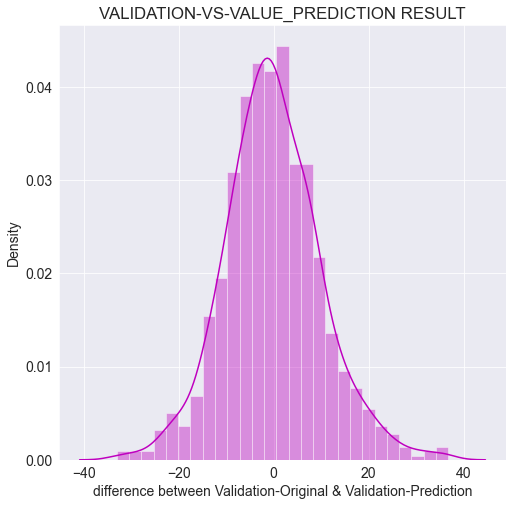

In [274]:
difference = (val_pred-y_val)
plt.figure(figsize=(8,8))
sns.distplot(difference, color='m')
plt.title('VALIDATION-VS-VALUE_PREDICTION RESULT')
plt.xlabel('difference between Validation-Original & Validation-Prediction')
plt.show()

## LGB model is best to save

In [275]:
# Lgb-model
file = open('model_lgb.pkl', 'wb')
# dump information to that file
pickle.dump(lgb_model, file)

## Working with test data

In [276]:
df_test = pd.read_csv('Test.csv')
df_test.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [277]:
test = df_test[x_col].copy()

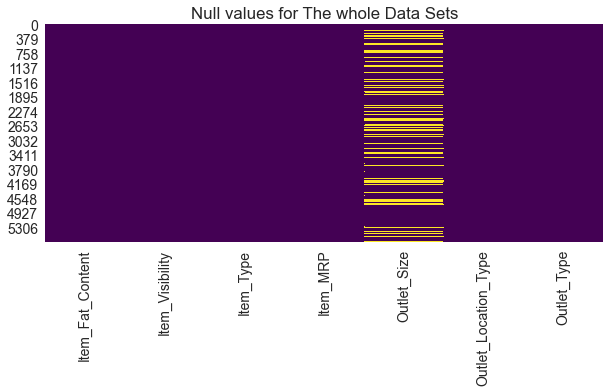

In [278]:
plt.rcParams['font.size'] =14
plt.figure(figsize=(10,4))
sns.heatmap(test.isnull(),cmap='viridis',cbar=False)
plt.title('Null values for The whole Data Sets')
plt.show()

In [279]:
test.Outlet_Size.fillna("Small",inplace= True)

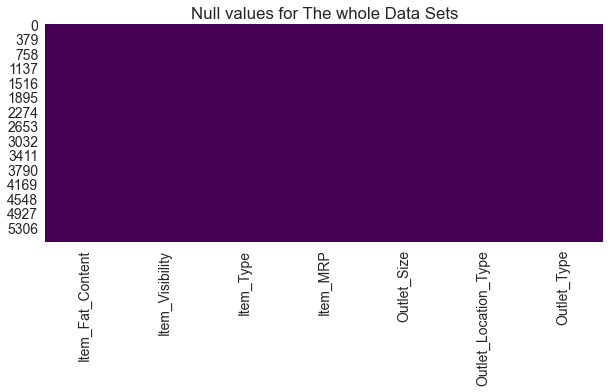

In [280]:
plt.rcParams['font.size'] =14
plt.figure(figsize=(10,4))
sns.heatmap(test.isnull(),cmap='viridis',cbar=False)
plt.title('Null values for The whole Data Sets')
plt.show()

### making pipelines on test data

In [281]:
def preprocess_test_data(df_test):
    test = df_test[x_col].copy()
    test.Outlet_Size.fillna("Small",inplace= True)
    test['Item_Fat_Content'] = test['Item_Fat_Content'].map({'Low Fat':'low_fat','low fat':'low_fat',
                                                             'LF':'low_fat','reg':'regular','Regular':'regular'})
    test['Outlet_Size'].replace({'Small':1,'Medium':2,'High':3},inplace = True)
    test['Outlet_Location_Type'].replace({'Tier 1':3,'Tier 2':2,'Tier 3':1},inplace = True)
    test['Outlet_Type'].replace({'Supermarket Type1':4,'Supermarket Type2':3,
                                 'Supermarket Type3':2,'Grocery Store':1},inplace = True)
    
    test = pipe.transform(test)
    return test

In [282]:
x_test = preprocess_test_data(df_test) 

In [283]:
x_test

array([[0., 0., 0., ..., 2., 3., 4.],
       [0., 0., 0., ..., 1., 2., 4.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 2., 4.],
       [0., 0., 0., ..., 1., 2., 4.],
       [0., 0., 0., ..., 1., 2., 4.]])

In [284]:
def test_prediction(x_test):
    res = lgb_model.predict(x_test)
    return res**2

In [285]:
results = test_prediction(x_test)

In [286]:
results

array([1591.03143938, 1324.30861451,  531.86049058, ..., 1875.99861974,
       3446.39134358, 1225.72685013])

## original Test Data

In [287]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [288]:
df_test['Item_Outlet_Sales'] = results

In [289]:
df_test.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5663,DRH36,16.200,Low Fat,0.033516,Soft Drinks,72.8696,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.278005
949,DRD37,NaN,Low Fat,0.013775,Soft Drinks,45.1060,OUT027,1985,Medium,Tier 3,Supermarket Type3,1023.600500
5503,FDW37,19.200,Low Fat,0.124243,Canned,91.6488,OUT049,1999,Medium,Tier 1,Supermarket Type1,1370.874532
2454,FDJ56,8.985,Low Fat,0.183250,Fruits and Vegetables,101.8700,OUT013,1987,High,Tier 3,Supermarket Type1,1588.579337
165,FDZ48,17.750,Low Fat,0.127141,Baking Goods,110.5544,OUT010,1998,NaN,Tier 3,Grocery Store,251.650077


### saving test_data with 'outlet_Sales_prediction' as 'Item_Outlet_Sales'

In [290]:
df_test.to_csv('test_results.csv', index=None)

# -------Story Of The Data---------

## A. Market Relations (statistical analysis)

**Item_MRP is highly related to the market sales also Outlet_Type & Outlet_Size are positively related to market sales.**

**Item_Weight & Item_Type are not that much related to Market Sales.**

**Super Market-3 in Tier-3 locations are most important than other Markets.**

**Outlet_Location_Type is negetively related to the Market Sales. That means Tier-3 locations are more important than Tier-1 locations.**

# B. Sales

**As a hole Sales in Strachy items and Seafood has the higest comparing to other items, even items in Seafood are lowest in the market.**

**In Super Market-1 sales in seafood and Strachy items are highest.**

**In Super Market-2 sales in seafood beating all.**

**In Super Market-3 sales in Break fast , Fruits & Vegetables are highest.**

**In Grocery Shops sales in Break fast, Meats & Bread are maximum.**

# C.  Items in Market

**As a hole Dairy Items are maximum in the Market and next highest items are Soft Drinks where lowest items are Seafood.**

**In Super marke-1, Dairy Items are maximum but next highest items are Meats and lowest items are seafood.**

**In Super marke-2, Soft Drinks and Baking Goods are highest where as Breakfast Items are lowest.**

**In Super marke-3, Snak Foods and Hard Drinks are highest where Bread items are lowest.**

**In Grocery Shops, Fruits & Vegetables and Baking Goods are highest where Seafood are Lowest.**

# D. Locations

**Location wise the shops are distributed in three type of locations i,e Tier-1, Tier-2 & Tier-3.**

**Size wise four types of shops are there (1).Super Market-1 (2).Super Market-2 (3).Super Market-3 & (4).Grocery Shops.**

**Super Market-1 are in three sizes Small, Medium & High where Super Market-2 & Super Market-3 are all medium size and Grocery shops are all small sized.**

**Number wise Markets in Tier-2 Location are Maximum**

**Super Market-1 are located in all locations i,e Tier-1, Tier-2 & Tier-3.**

**But Super Market-2 & Super Market-3 are located only on Tier-3 locations.**

**Grocery Shops are located on Tier-1 & Tier-3 locations.**

### -------------Thanks------------